In [86]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

bog = pd.read_csv('Bog.csv')
tf_idf = pd.read_csv('tf_idf.csv')

### Modelo para Bag of Words ( n = 1, 2)
Se realiza el respectivo modelo NaiveBayes para el conjunto de datos realizado con la tecnica Bag of Words para n = 1, 2.

In [87]:
bog.head()

,00,000,01,02,05,08,09,10,100,11,...,work,working,world,would,would like,wrote,www,year,years,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,7,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,6,0,0,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,5,0,0,1


In [88]:
#Division en sets de train y test
bog_train, bog_test = np.split(bog.sample(frac=1, random_state=30), [int(.7*len(bog))])

In [89]:
#Separacion de target y features para los conjuntos de test y train.
target_bog_train = bog_train['Label']
feature_bog_train = bog_train.drop(['Label'], axis = 1)

target_bog_test = bog_test['Label']
feature_bog_test = bog_test.drop(['Label'], axis = 1)

In [90]:
#Creacion del modelo
naiveBB = MultinomialNB()
naiveBB.fit(feature_bog_train, target_bog_train)

MultinomialNB()

In [91]:
#Prueba para el conjunto de entrenamiento, esto se hace para luego comprar resultados con el conjunto de test y determinar si hay overfitting o no.
bog_predict_train = naiveBB.predict(feature_bog_train)
print("El valor de accuracy con la data de entrenamiento es de: ", metrics.accuracy_score(target_bog_train, bog_predict_train))

El valor de accuracy con la data de entrenamiento es de:  0.8551460113960114


In [92]:
#Prueba sobre conjunto de test y obtencion de metricas varias.
bog_predict_test = naiveBB.predict(feature_bog_test)
print("El valor de accuracy con la data de entrenamiento es de: ", metrics.accuracy_score(target_bog_test, bog_predict_test))

El valor de accuracy con la data de entrenamiento es de:  0.8568757789779808


In [93]:
print(metrics.classification_report(target_bog_test, bog_predict_test, target_names=["Legit", "SPAM"]))

              precision    recall  f1-score   support

       Legit       0.88      0.87      0.87      2784
        SPAM       0.82      0.84      0.83      2030

    accuracy                           0.86      4814
   macro avg       0.85      0.86      0.85      4814
weighted avg       0.86      0.86      0.86      4814



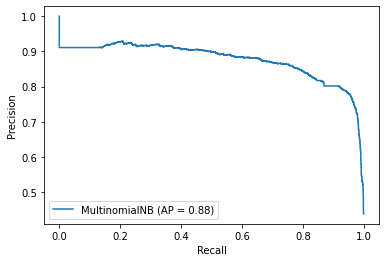

In [94]:
metrics.plot_precision_recall_curve(naiveBB, feature_bog_test, target_bog_test)

Podemos ver que el modelo para la tecnica Bag Of Words es bastante bueno pero tiene ciertas fallas, este llega a tener un accuracy de 0.856 para al conjunto de test, al comparar este dato con el obtenido para la prediccion del conjunto de train nos podemos dar cuenta que el modelo no tiene overfittin, esto ya que el valor del accuracy del conjunto de test es incluso mayor al obtenido con el conjunto training, el cual fue de 0.855, lo que nos indica que no se sobre ajusto a los datos del conjunto de training.

Adicionalmente todos los valores de precision, recall y F1 nos indican que el modelo es considerablemente aceptable para nuestro caso de uso. Sin duda alguna el indicador de mas interes en este caso es el de los verdaderos positivos, es decir el recall cuyo valor es el mas alto al tratarse de sitios legitimos pero es el mas bajo al tratarse de SPAM. Esto quiere decir que es mas efectivo identificando si un correo es legitimo que identificando si es SPAM. Esto nos trae a la luz que el modelo puede ser suseptible a falsos negativos, lo cual es el worst-case-scenario en este tipo de situaciones ya que pone en peligro la informacion del usuario. Para este modelo los valores mas bajos de precision, recall y F1 sucedieron en los casos de SPAM, esto nos da a entender que al modelo se le complica un poco delimitar si un correo es SPAM, y puede llegar a caer en falsos positivos y falsos negativos.

### Modelo para TF-IDF
Se realiza el respectivo modelo NaiveBayes para el conjunto de datos realizado con la tecnica TF-IDF.

In [95]:
tf_idf.head()

,00,000,01,02,05,08,09,10,100,11,...,without,work,working,world,would,wrote,www,year,years,Label
0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1
1,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.00,1
2,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.61,0.0,0.00,1
3,0.0,0.0,0.0,0.07,0.0,0.07,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.07,1
4,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.0,0.00,1


In [96]:
#Division en sets de train y test
tf_idf_train, tf_idf_test = np.split(tf_idf.sample(frac=1, random_state=30), [int(.7*len(tf_idf))])

In [97]:
#Separacion de target y features para los conjuntos de test y train.
target_tf_idf_train = tf_idf_train['Label']
feature_tf_idf_train = tf_idf_train.drop(['Label'], axis = 1)

target_tf_idf_test = tf_idf_test['Label']
feature_tf_idf_test = tf_idf_test.drop(['Label'], axis = 1)

In [98]:
#Creacion del modelo
naive_tf_idf = MultinomialNB()
naive_tf_idf.fit(feature_tf_idf_train, target_tf_idf_train)

MultinomialNB()

In [99]:
#Prueba para el conjunto de entrenamiento, esto se hace para luego comprar resultados con el conjunto de test y determinar si hay overfitting o no.
tf_idf_predict_train = naive_tf_idf.predict(feature_tf_idf_train)
print("El valor de accuracy con la data de entrenamiento es de: ", metrics.accuracy_score(target_tf_idf_train, tf_idf_predict_train))

El valor de accuracy con la data de entrenamiento es de:  0.8805199430199431


In [100]:
#Prueba sobre conjunto de test y obtencion de metricas varias.
tf_idf_predict_test = naive_tf_idf.predict(feature_tf_idf_test)
print("El valor de accuracy con la data de entrenamiento es de: ", metrics.accuracy_score(target_tf_idf_test, tf_idf_predict_test))

El valor de accuracy con la data de entrenamiento es de:  0.8818030743664312


In [101]:
print(metrics.classification_report(target_tf_idf_test, tf_idf_predict_test, target_names=["Legit", "SPAM"]))

              precision    recall  f1-score   support

       Legit       0.88      0.91      0.90      2784
        SPAM       0.88      0.84      0.86      2030

    accuracy                           0.88      4814
   macro avg       0.88      0.88      0.88      4814
weighted avg       0.88      0.88      0.88      4814



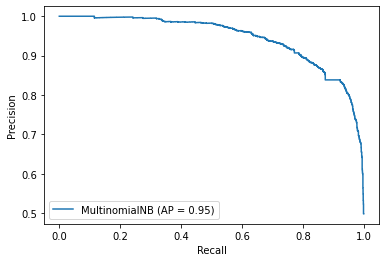

In [102]:
metrics.plot_precision_recall_curve(naive_tf_idf, feature_tf_idf_test, target_tf_idf_test)

Podemos ver que el modelo realizado con TF_IDF tiene una clara mejoria en relacion al anterior ya que su accuracy es de 0.881, primero comenzamos realizando el analisis de sobre ajuste y delimitamos que no hay ya que el accuracy del conjunto de train y test son bastante cercanos, lo que nos indica que el modelo no esta sobre ajustado a los datos del conjunto de training.

Luego vemos una clara mejoria en los valores de precision, recall y F1 en comparacion al modelo anterior, apesar de que los valores relacionados a los datos de SPAM sigen siendo los mas bajos estos aun pueden considerarse aceptables. En este modelo el riesgo de generar falsos negativos disminuye considerablemente, por lo que se le puede considerar el mejor modelo entre ambos realizados.

## Conclusiones

- El mejor modelo generado fue donde se utilizo TF_IDF, este genero un mayor valor de accuracy ante el modelo generado a partir de la tecnica Bag Of Words
- Los valores de precision en este modelo fueron bastante aceptables tanto para el caso de los correos legitimos y los correos clasificados como SPAM.
- En el caso del recall el valor de aquellos correos legitimos es mas alto que el de los de SPAM, esto puede representar un riesgo de falsos negativos en nuestra prediccion, el cual es el Worst-Case para este tipo de problemas.
- Finalmente el F1 tiene un valor muy aceptable en ambos casos, este valor nos sirve para encontrar un balance entre presicion y recall y nos ayuda a determinar la cantidad de falsos negativos y falsos positivos, en este caso el valor es bastante alto en ambos casos por lo que podemos determinar que es un modelo efectivo.